# Get the data

In [1]:
import os
import urllib.request

if not os.path.exists("the-verdict.txt"):
    url = ("https://raw.githubusercontent.com/rasbt/"
           "LLMs-from-scratch/main/ch02/01_main-chapter-code/"
           "the-verdict.txt")
    file_path = "the-verdict.txt"
    urllib.request.urlretrieve(url, file_path)

In [2]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
    
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


# Split the data into Tokens

In [3]:
import re

text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)

print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [4]:
result = re.split(r'([,.]|\s)', text)

print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


## Removing redunant Characters

The `strip()` method removes any leading (starting) and trailing (ending) whitespaces from a given string.

message = '     Learn Python  '

print(message.strip())

**Output**: Learn Python

In [5]:
# Strip whitespace from each item and then filter out any empty strings.
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


In [6]:
text = "Hello, world. Is this-- a test?" 
result = re.split(r'([,.:;?_!"()\']|--|\s)', text) 
result = [item.strip() for item in result if item.strip()]
result

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']

# Applying the Tokenizer on main Text

In [7]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
len(preprocessed) 

4690

In [8]:
print([preprocessed[:30]])

[['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']]


### Assigning unique ID to each Token

In [9]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
vocab_size

1130

In [10]:
vocab = {token:integer for integer,token in enumerate(all_words)}

In [11]:
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


Let’s implement a complete tokenizer class in Python with
 an encode method that splits text into tokens and carries out
 the string-to-integer mapping to produce token IDs via the
 vocabulary. In addition, we’ll implement a decode method
 that carries out the reverse integer-to-string mapping to
 convert the token IDs back into text. The following listing
 shows the code for this tokenizer implementation.
 Listing 2.3 Implementing a simple text tokenize

In [12]:
import sys
def printError(e):
    error_type = type(e).__name__
    line_number = sys.exc_info()[-1].tb_lineno
    if e.args:
        error_name = e.args[0]
    else:
        error_name = "No additional information available"
    error_msg = f"Error Type: {error_type}\nError Name: {error_name}\nLine where error occurred: {line_number}"
 
    print(error_msg)

In [13]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}
    
    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
                                
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
        
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [14]:
tokenizer = SimpleTokenizerV1(vocab)

text = """"It's the last he painted, you know," 
           Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [15]:
print(tokenizer.decode(ids))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


 We have implemented a tokenizer capabale of tokenizing and detokenizing text based on snippet form the training set. Let's now apply it to a new sample not contained in training set.

In [16]:
text = "My name is Faraz"
print(tokenizer.encode(text))

KeyError: 'name'

The problem is that the word “Hello” was not used in the
“The Verdict” short story. Hence, it is not contained in the vocabulary. This highlights the need to consider large and
diverse training sets to extend the vocabulary when working
on LLMs.


In [17]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>","<|unk|>"])
vocab = {token : integer for integer , token in enumerate(all_tokens)}

print(len(vocab.items()))

1132


- We also need to adjust the tokenizer accordingly so that it knows when and how to use the new `<unk>` token

In [18]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}
    
    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int 
            else "<|unk|>" for item in preprocessed
        ]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
        
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [19]:
text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of palace."
text = "<|endoftext|>".join((text1, text2))
text

'Hello, do you like tea?<|endoftext|>In the sunlit terraces of palace.'

In [20]:
tokenizer = SimpleTokenizerV2(vocab)
tokenizer.encode(text)

[1131, 5, 355, 1126, 628, 975, 10, 1131, 988, 956, 984, 722, 1131, 7]

In [21]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|unk|> the sunlit terraces of <|unk|>.'

# Byte Pair Encoding (BPE)

In [22]:
import tiktoken
from importlib.metadata import version
print(version('tiktoken'))

0.8.0


In [23]:
tokenizer = tiktoken.get_encoding('gpt2')

In [24]:
text = (
    "Hello, do you like fucking tea? <|endoftext|> In the sunlit terraces"
    "of someunkownplcaes of Faraz."
)

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
integers

[15496,
 11,
 466,
 345,
 588,
 9372,
 8887,
 30,
 220,
 50256,
 554,
 262,
 4252,
 18250,
 8812,
 2114,
 1659,
 617,
 2954,
 593,
 489,
 6888,
 274,
 286,
 6755,
 1031,
 13]

We can make two noteworthy observations based on the token IDs and decoded text.
 - First, the <|endoftext|> token is
 assigned a relatively large token ID, namely, 50256. In fact,
 the BPE tokenizer, which was used to train models such as
 GPT-2, GPT-3, and the original model used in ChatGPT, has a
 total vocabulary size of 50,257, with <|endoftext|> being
 assigned the largest token ID.

 - Second, the BPE tokenizer encodes and decodes unknown
 words, such as someunknownPlace, correctly. The BPE tokenizer
 can handle any unknown word

 

The algorithm underlying BPE breaks down words that aren’t
in its predefined vocabulary into smaller subword units or
even individual characters, enabling it to handle out-of
vocabulary words. So, thanks to the BPE algorithm, if the
tokenizer encounters an unfamiliar word during
tokenization, it can represent it as a sequence of subword
tokens or characters

In [25]:
strings = tokenizer.decode(integers)
strings

'Hello, do you like fucking tea? <|endoftext|> In the sunlit terracesof someunkownplcaes of Faraz.'

In [26]:
tokenizer.encode('Akwirw ier')

[33901, 86, 343, 86, 220, 959]

![Screenshot 2025-01-27 153444.png](<attachment:Screenshot 2025-01-27 153444.png>)
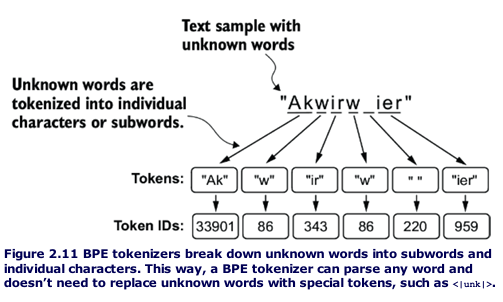

# Data sampling with a sliding window

In [27]:
with open("the-verdict.txt",'r',encoding='utf-8') as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
len(enc_text)

5145

`5145` is  the total number of tokens in the training set, after applying the BPE tokenizer.

we remove the first 50 tokens from the dataset for
demonstration purposes, as it results in a slightly more
interesting text passage in the next steps

In [28]:
enc_sample = enc_text[50:]
len(enc_sample)

5095

One of the easiest and most intuitive ways to create the
input–target pairs for the next-word prediction task is to
create two variables, x and y, where x contains the input
tokens and y contains the targets, which are the inputs
shifted by 1

In [29]:
context_size = 4
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]
print(f'x:{x}')
print(f'y: {y}')

x:[290, 4920, 2241, 287]
y: [4920, 2241, 287, 257]


By processing the inputs along with the targets, which are
the inputs shifted by one position, we can create the next
word prediction tasks as follows

In [30]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


Everything left of the arrow `(---->)` refers to the input an
LLM would receive, and the token ID on the right side of the
arrow represents the target token ID that the LLM is
supposed to predict.

Let’s repeat the previous code but
convert the token IDs into text:


In [31]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]
    print(tokenizer.decode(context), '---->', tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


 We’ve now created the input–target pairs that we can use
 for LLM training

Now the last before we can turn tokens into embeddings is implementing an efficient data loader that iterates over the input dataset and returns the inputs and targets as Pytorch tensor, which can be tought of multidimensional array.

In [35]:
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):

    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt)

        for i in range(0,len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i +1:i+max_length+1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]        


In [36]:
def create_dataloader_v1(txt, bacth_size=4, max_length=256,
                         stride = 128, shuffle=True, drop_last=True,
                         num_workers= 0):
    
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset = GPTDatasetV1(txt,  tokenizer, max_length, stride)
    dataloader = DataLoader(
        dataset,
        batch_size=bacth_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [37]:
with open("the-verdict.txt",'r', encoding='utf-8') as f:
    raw_text = f.read()

dataloader = create_dataloader_v1(
    raw_text, bacth_size=1, max_length=4, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
first_batch

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]